**Course:** Neural Computing and Deep Learning
---
**Title:** Project 7
---
**Mahdi Mirfendereski - 401131065**
---


# Libraries


In [1]:
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Embedding, multiply, Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras import initializers
from tensorflow import keras
import numpy as np
import tensorflow as tf


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Datasets


X_train.shape (60000, 28, 28)
y_train.shape (60000,)
After normalizing ...
X_train.shape (60000, 784)
y_train.shape (60000,)


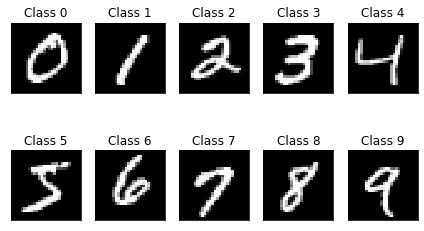

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

X_train = X_train.reshape(60000, 28*28)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('After normalizing ...')

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

# CGAN


In [3]:
latent_dim = 100
num_classes = 10
init = initializers.RandomNormal(stddev=0.02)
img_dim = 28 * 28
label = Input(shape=(1,), dtype='int32')
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)


## Generator


In [4]:
## input
label = Input(shape=(1,), dtype='int32')
label_embedding = Embedding(num_classes, latent_dim)(label)
label_embedding = Flatten()(label_embedding)
z = Input(shape=(latent_dim,))
input_generator = multiply([z, label_embedding])

##########
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(256, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
# generator.add(BatchNormalization())

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
# generator.add(BatchNormalization())

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
# generator.add(BatchNormalization())

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))



# Output image
output = generator(input_generator)

# Generator with condition input
generator = Model([z, label], output)




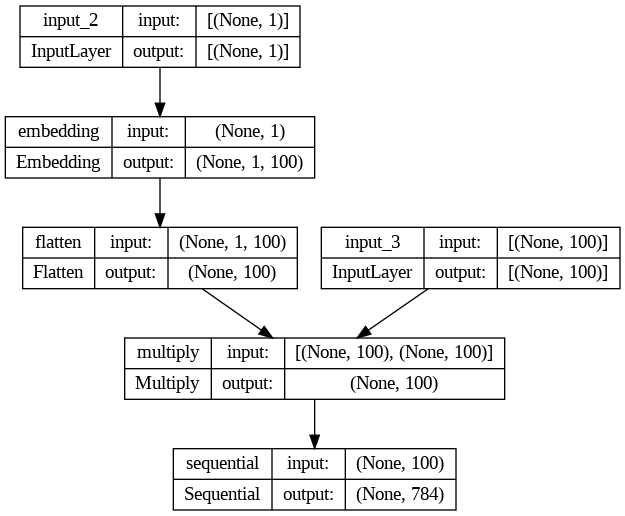

In [5]:
keras.utils.plot_model(generator, show_layer_activations=True, show_shapes=True, show_layer_names=True)

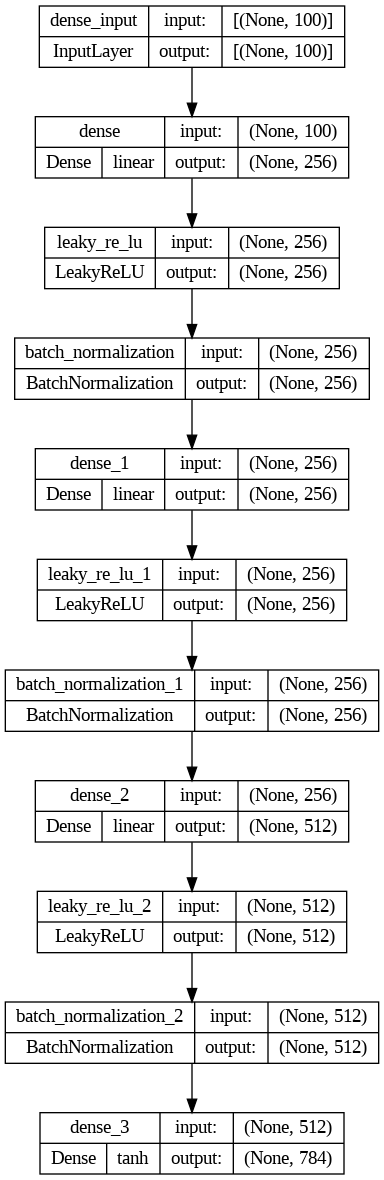

In [6]:
keras.utils.plot_model(generator.get_layer(name='sequential') , show_layer_activations=True, show_shapes=True, show_layer_names=True)

## Discriminator


In [7]:
label_d = Input(shape=(1,), dtype='int32')
label_embedding_d = Embedding(num_classes, img_dim)(label_d)
label_embedding_d = Flatten()(label_embedding_d)

# imagem dimension 28x28
img_d = Input(shape=(img_dim,))

# Merge inputs (img x label)
input_discriminator = multiply([img_d, label_embedding_d])

# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(256, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.3))

# Hidden layer 2
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.3))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.3))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator = Model([img_d, label_d], discriminator(input_discriminator))


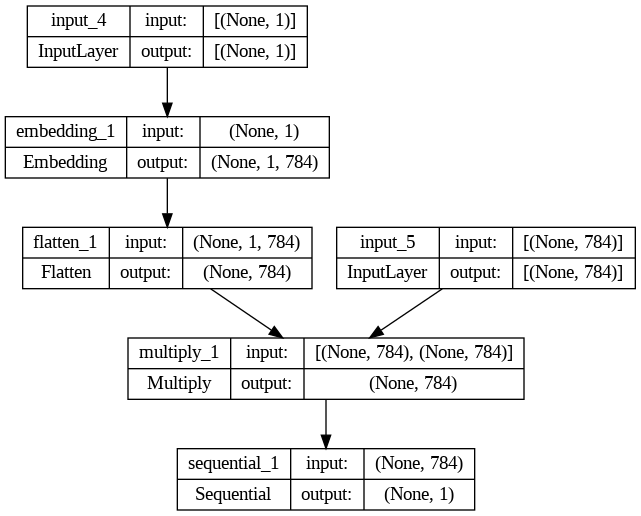

In [8]:
keras.utils.plot_model(discriminator, show_layer_activations=True, show_shapes=True, show_layer_names=True)

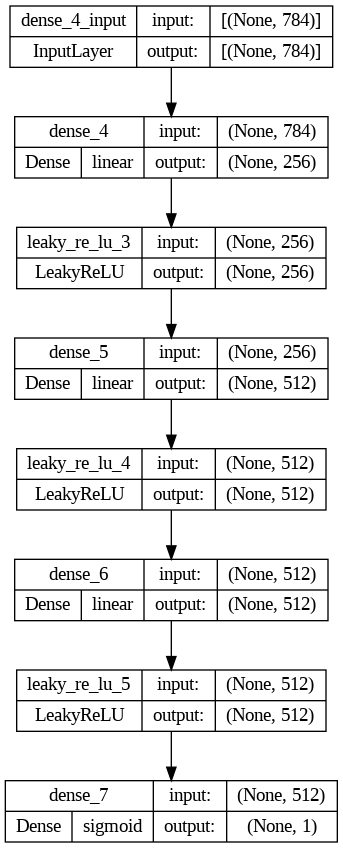

In [9]:
keras.utils.plot_model(discriminator.get_layer(name='sequential_1') , show_layer_activations=True, show_shapes=True, show_layer_names=True)

In [10]:
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
discriminator.trainable = False
cgan = Model([z, label], discriminator([generator([z, label]), label]))
cgan.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

epoch = 1/20, discriminator_loss=0.593, g_loss=1.287                                                                                                     
4/4 [==============================] - 0s 4ms/step


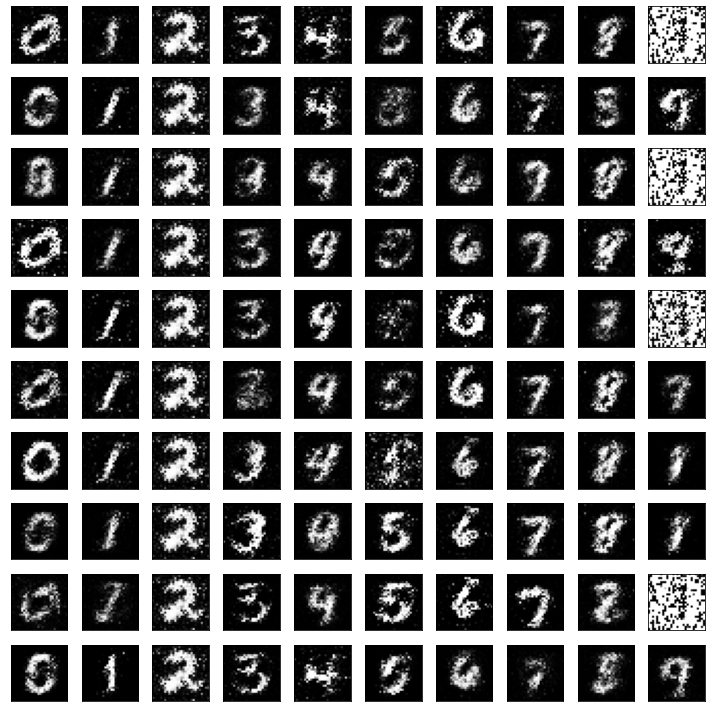

epoch = 2/20, discriminator_loss=0.675, g_loss=1.008                                                                                                     
4/4 [==============================] - 0s 3ms/step


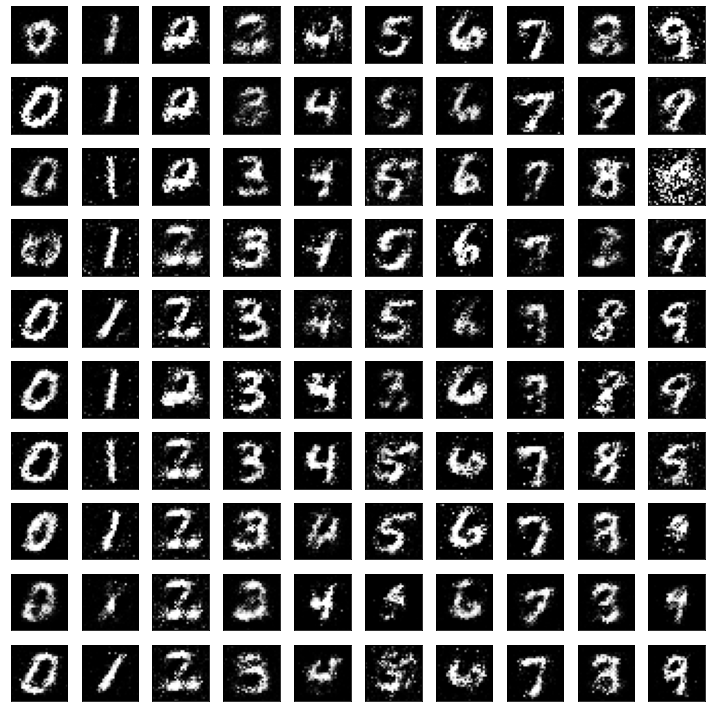

epoch = 3/20, discriminator_loss=0.666, g_loss=0.901                                                                                                     
4/4 [==============================] - 0s 6ms/step


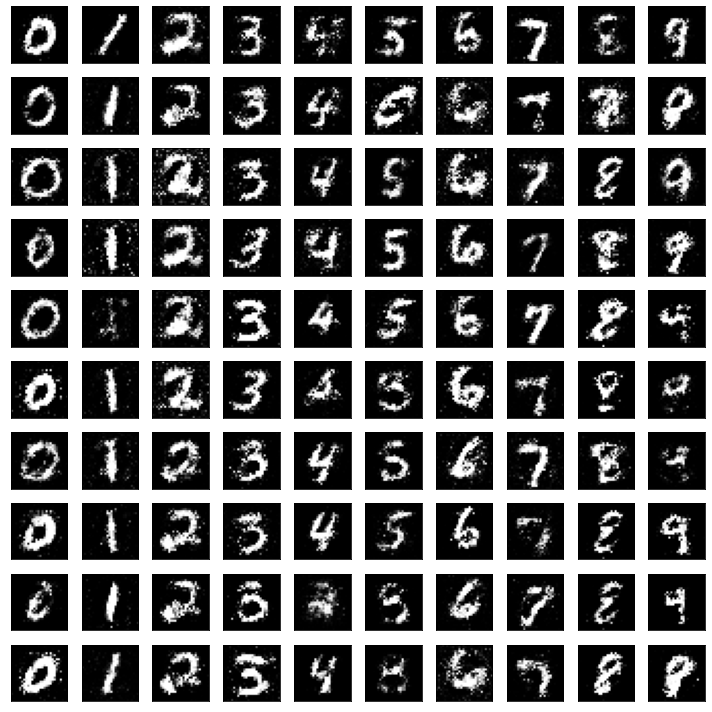

epoch = 4/20, discriminator_loss=0.682, g_loss=0.931                                                                                                     
4/4 [==============================] - 0s 5ms/step


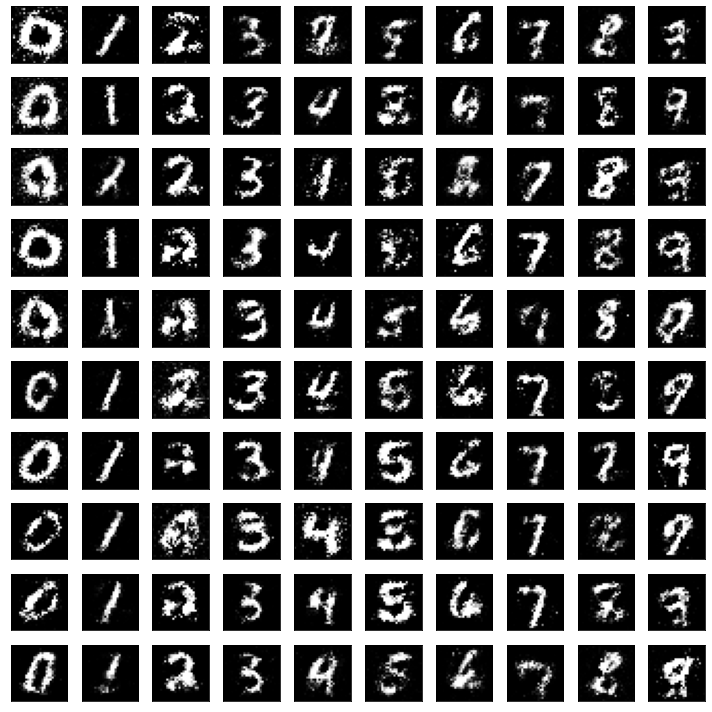

epoch = 5/20, discriminator_loss=0.637, g_loss=0.925                                                                                                     
4/4 [==============================] - 0s 7ms/step


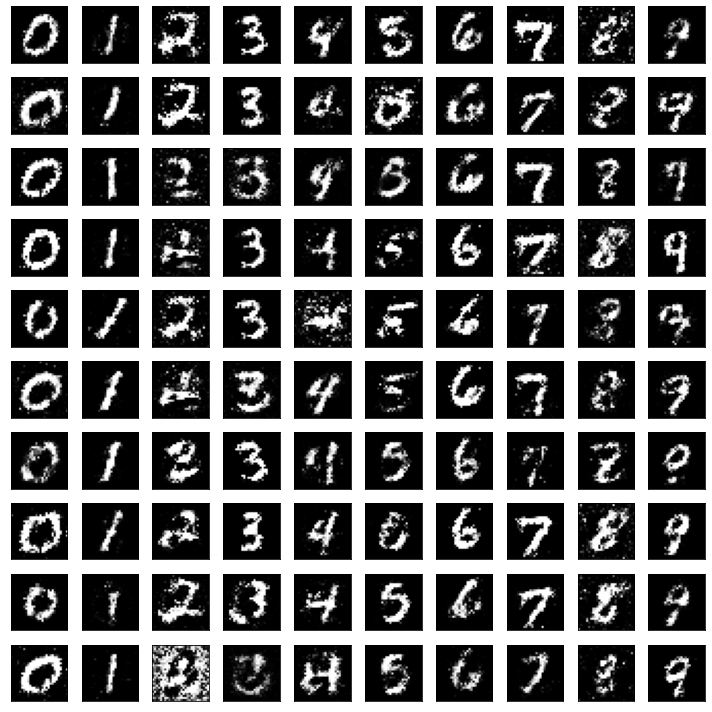

epoch = 6/20, discriminator_loss=0.664, g_loss=0.877                                                                                                     
4/4 [==============================] - 0s 6ms/step


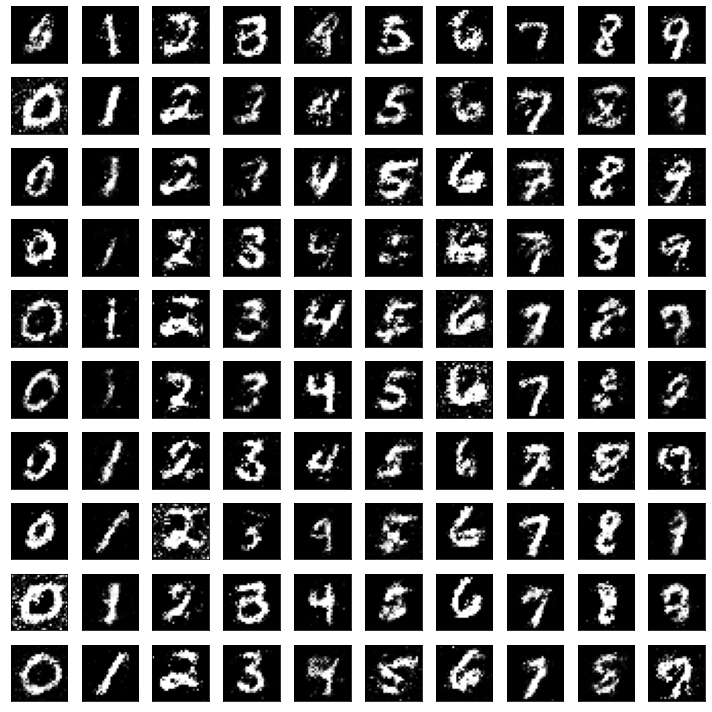

epoch = 7/20, discriminator_loss=0.677, g_loss=0.888                                                                                                     
4/4 [==============================] - 0s 4ms/step


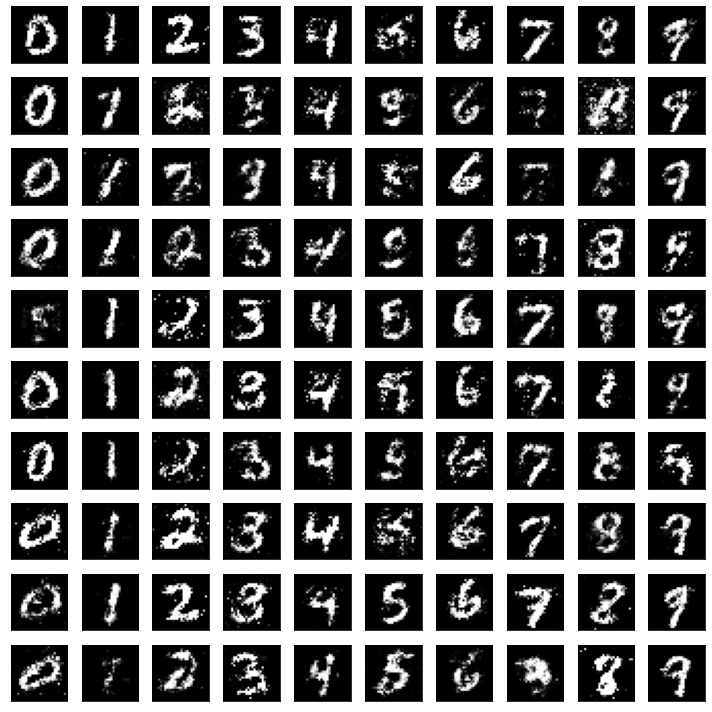

epoch = 8/20, discriminator_loss=0.662, g_loss=0.923                                                                                                     
4/4 [==============================] - 0s 7ms/step


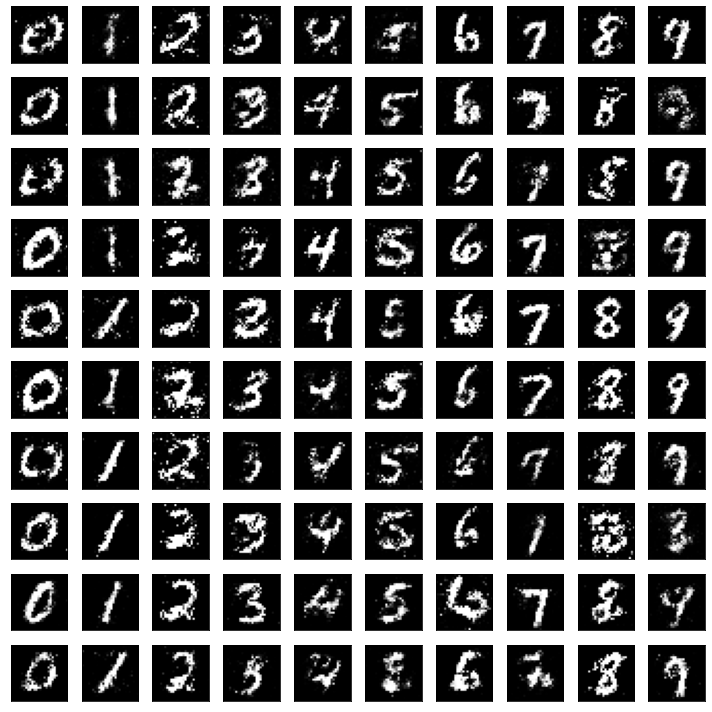

epoch = 9/20, discriminator_loss=0.646, g_loss=0.925                                                                                                     
4/4 [==============================] - 0s 3ms/step


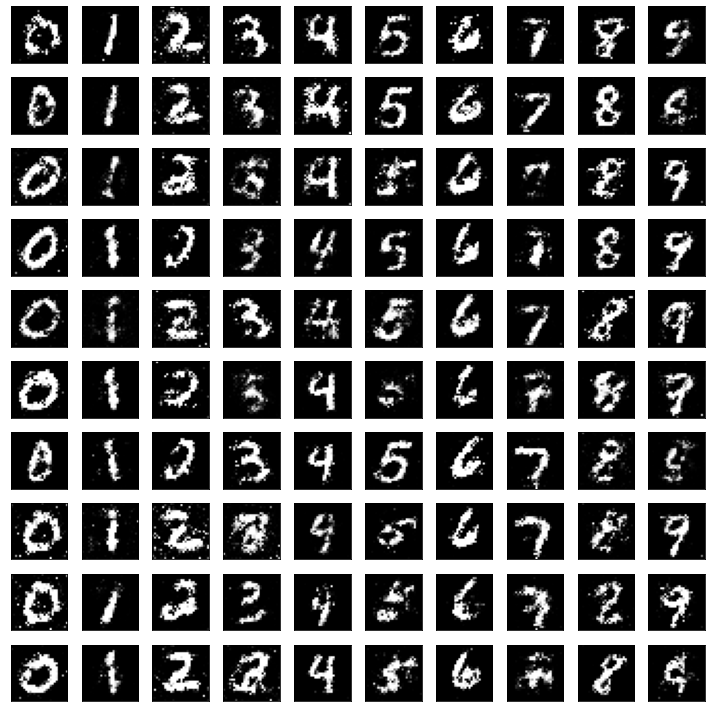

epoch = 10/20, discriminator_loss=0.623, g_loss=0.956                                                                                                     
4/4 [==============================] - 0s 5ms/step


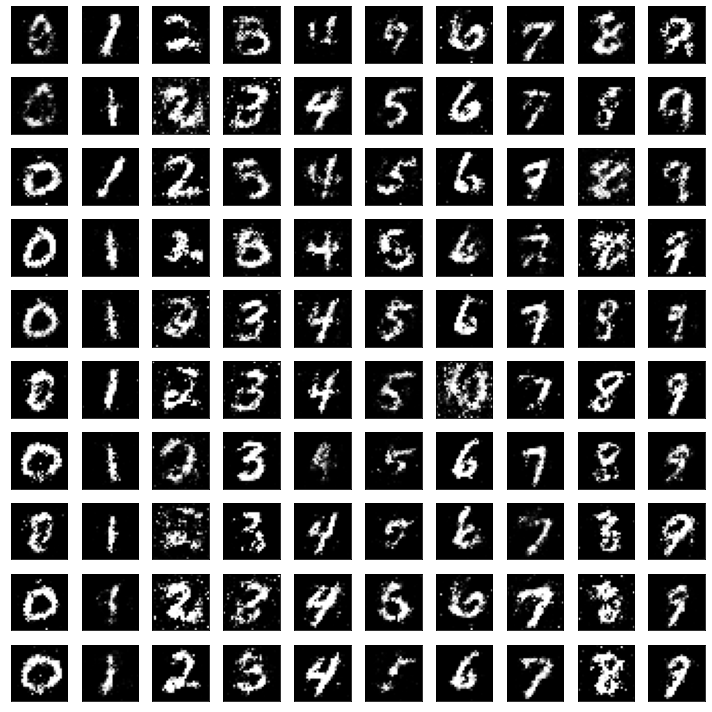

epoch = 11/20, discriminator_loss=0.656, g_loss=0.953                                                                                                     
4/4 [==============================] - 0s 6ms/step


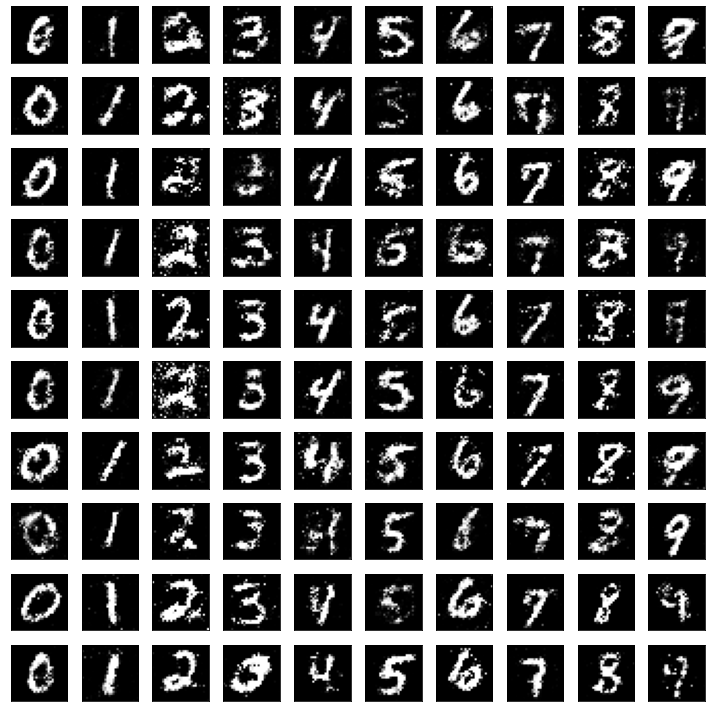

epoch = 12/20, discriminator_loss=0.649, g_loss=0.919                                                                                                     
4/4 [==============================] - 0s 6ms/step


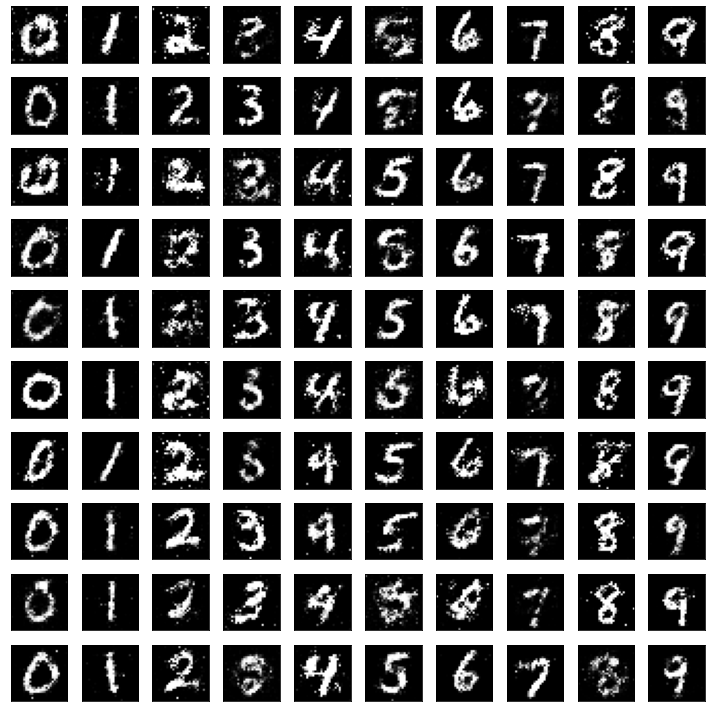

epoch = 13/20, discriminator_loss=0.610, g_loss=0.833                                                                                                     
4/4 [==============================] - 0s 6ms/step


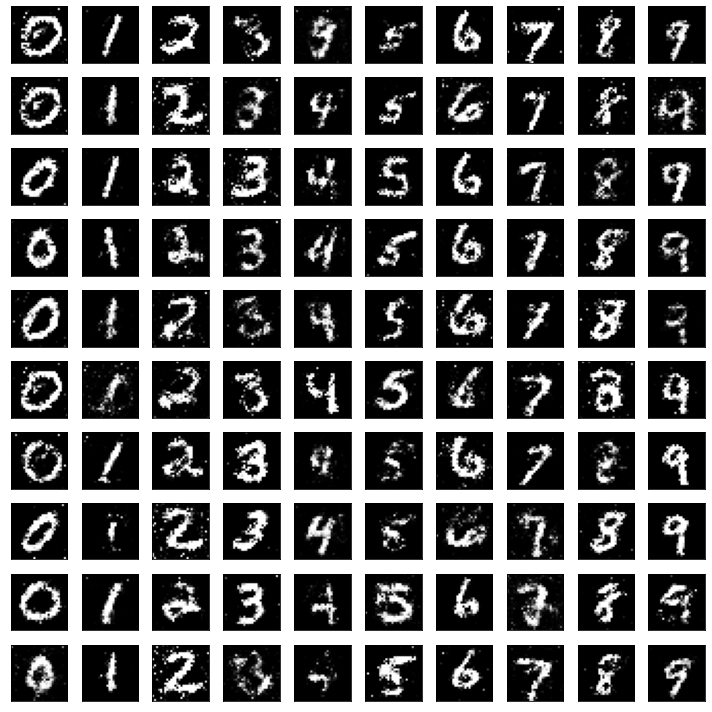

epoch = 14/20, discriminator_loss=0.592, g_loss=0.906                                                                                                     
4/4 [==============================] - 0s 8ms/step


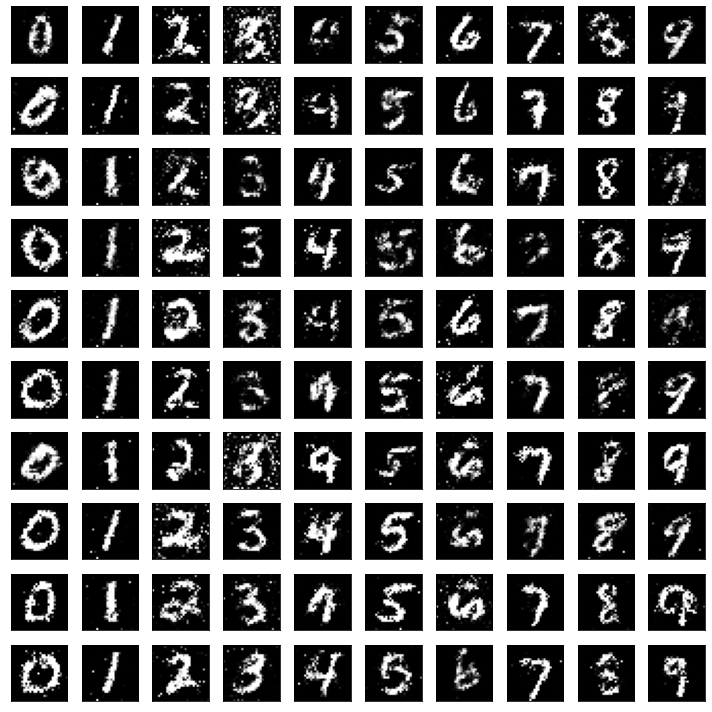

epoch = 15/20, discriminator_loss=0.642, g_loss=0.987                                                                                                     
4/4 [==============================] - 0s 5ms/step


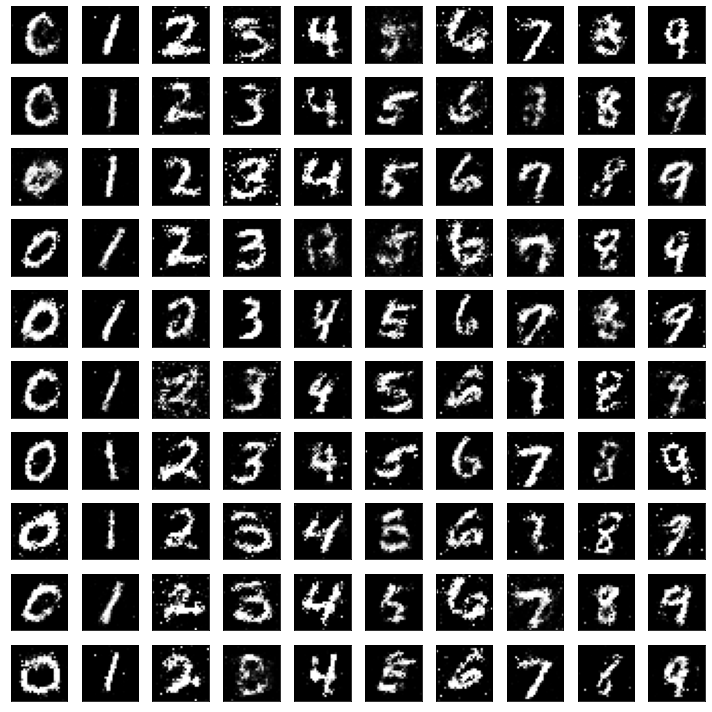

epoch = 16/20, discriminator_loss=0.620, g_loss=0.957                                                                                                     
4/4 [==============================] - 0s 3ms/step


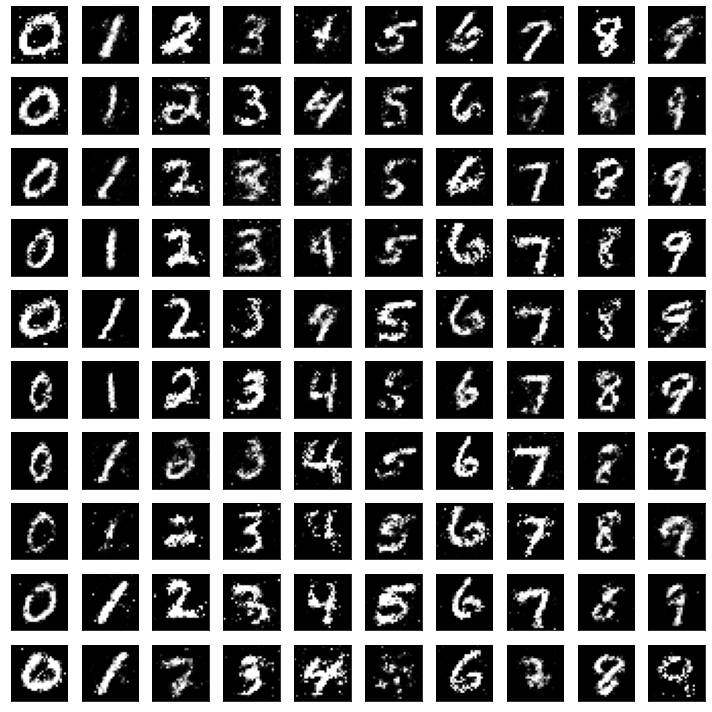

epoch = 17/20, discriminator_loss=0.715, g_loss=0.898                                                                                                     
4/4 [==============================] - 0s 7ms/step


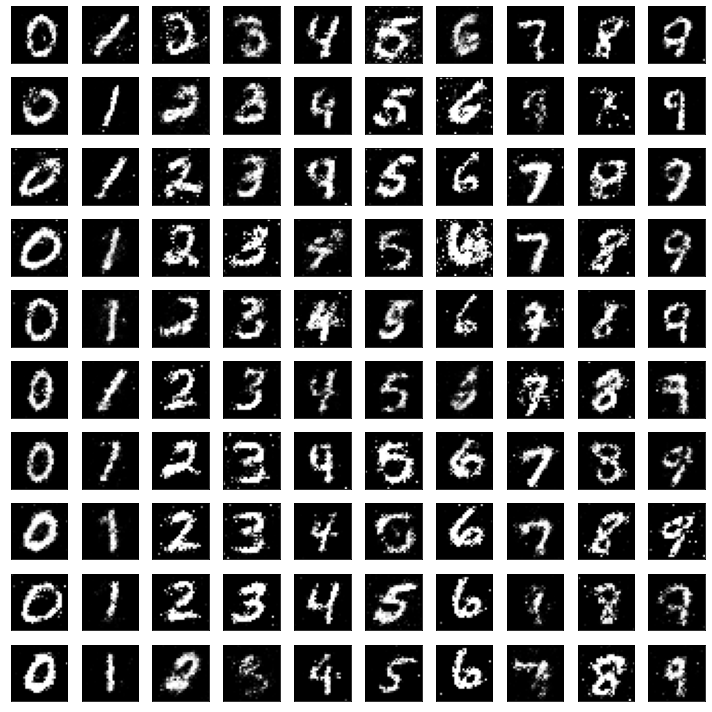

epoch = 18/20, discriminator_loss=0.646, g_loss=0.935                                                                                                     
4/4 [==============================] - 0s 3ms/step


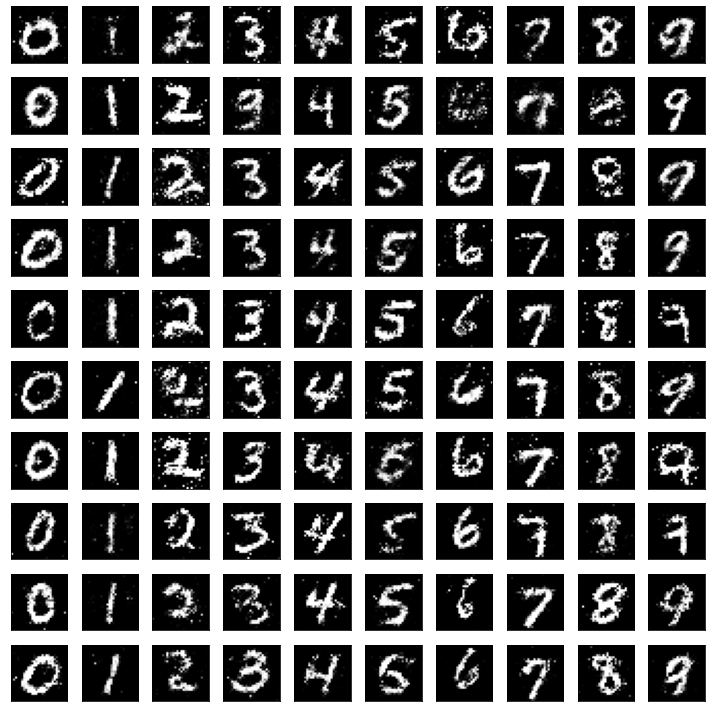

epoch = 19/20, discriminator_loss=0.635, g_loss=0.929                                                                                                     
4/4 [==============================] - 0s 5ms/step


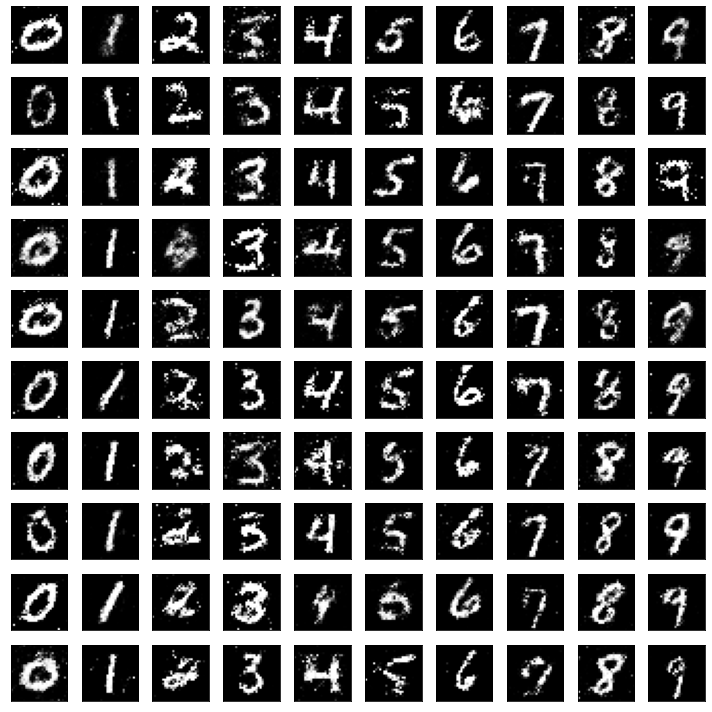

epoch = 20/20, discriminator_loss=0.663, g_loss=0.949                                                                                                     
4/4 [==============================] - 0s 5ms/step


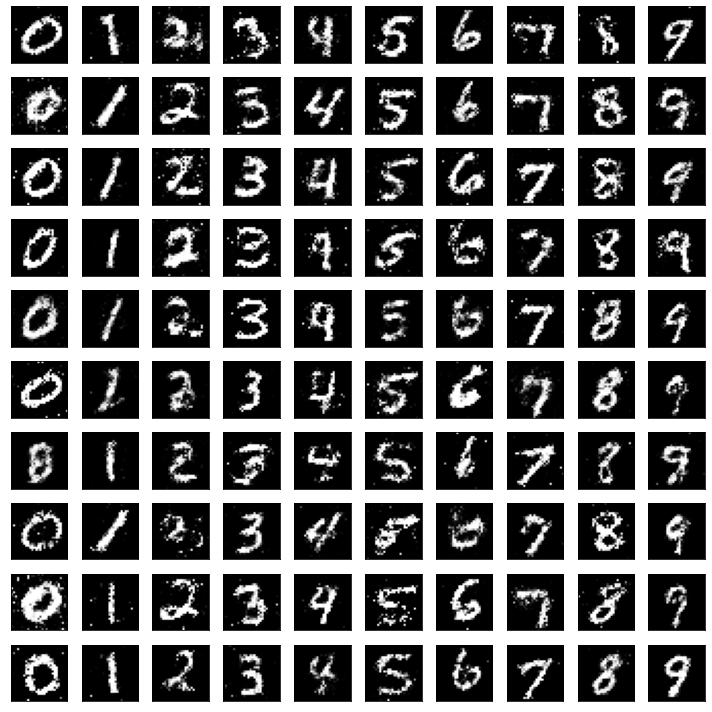

epoch = 21/20, discriminator_loss=0.658, g_loss=0.893                                                                                                     
4/4 [==============================] - 0s 6ms/step


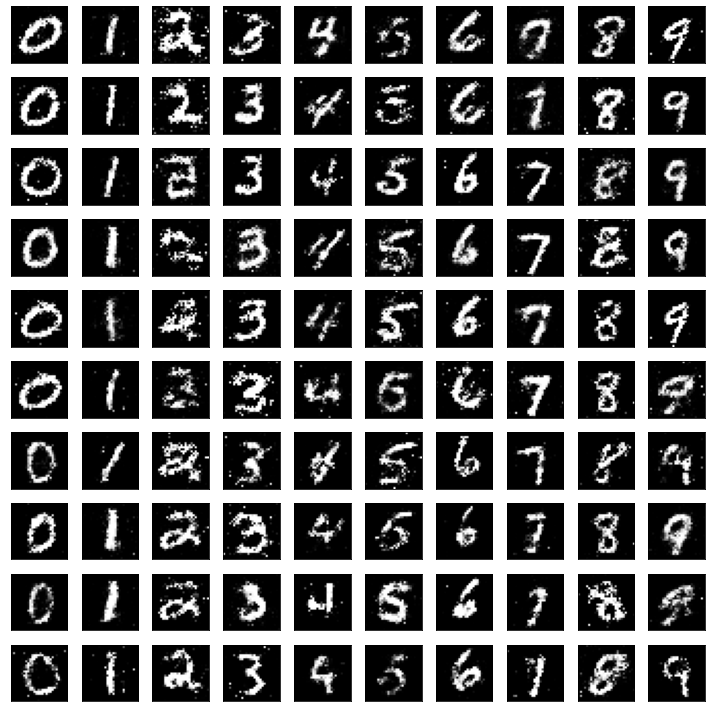

In [11]:
epochs = 20
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

discriminator_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        #########################
        # discriminator: current real data batch 
        discriminator.trainable = True
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        real_labels = y_train[i*batch_size:(i+1)*batch_size].reshape(-1, 1)
        
        discriminator_loss_real = discriminator.train_on_batch(x=[X_batch, real_labels], y=real * (1 - smooth))
        
        ##########################
        # discriminator: current fake data batch 
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        X_fake = generator.predict_on_batch([z, random_labels])
        
        discriminator_loss_fake = discriminator.train_on_batch(x=[X_fake, random_labels], y=fake)
         
        discriminator_loss_batch = 0.5 * (discriminator_loss_real[0] + discriminator_loss_fake[0])
        
        
        #################
        # train generator
        discriminator.trainable = False
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        d_g_loss_batch = cgan.train_on_batch(x=[z, random_labels], y=real)[0]
   

    ## discriminator loss 
    discriminator_loss.append(discriminator_loss_batch)
    d_g_loss.append(d_g_loss_batch)
    print('epoch = %d/%d, discriminator_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, discriminator_loss[-1], d_g_loss[-1]), 100*' ')

    ## create matrix
    samples = 100
    z = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
    labels = np.arange(0, 10).reshape(-1, 1)
    labels_ = np.asarray([x for _ in range(10) for x in range(10)]).reshape(-1, 1)


    x_fake = generator.predict([z, labels_])
    plt.figure(figsize=(10,10))
    for k in range(samples):
        plt.subplot(10, 10, k+1)
        plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

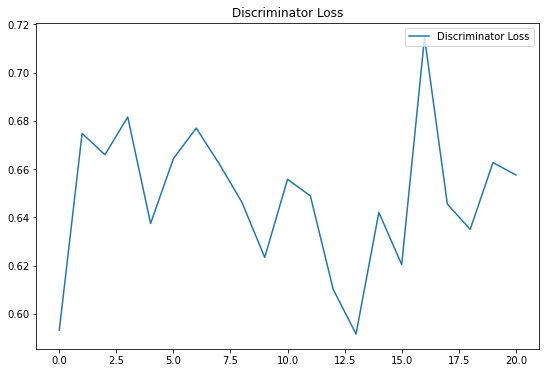

In [12]:
plt.figure(figsize=(9, 6))
plt.plot(range(epochs+1), discriminator_loss, label='Discriminator Loss')
plt.legend(loc='upper right')
plt.title('Discriminator Loss')
plt.show()

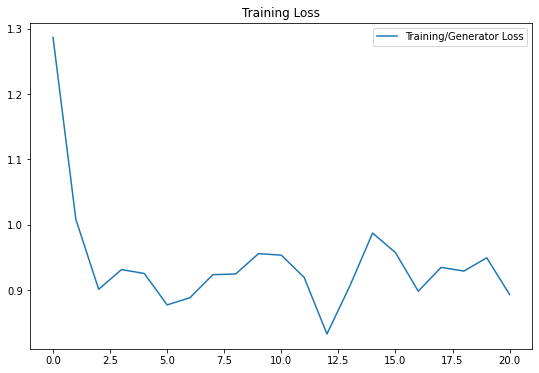

In [13]:
plt.figure(figsize=(9, 6))
plt.plot(range(epochs+1), d_g_loss, label='Training/Generator Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [2]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*")]
    frame_one = frames[0]
    frame_one.save("changes.gif", format="GIF", append_images=frames,
               save_all=True, duration=500, loop=1)
if __name__=="__main__":
    make_gif("./images")